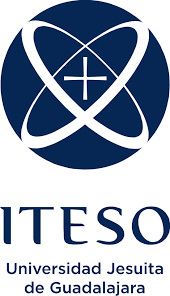
 
#  <div style="text-align: right"> <font>  Simulación de Procesos Financieros 
# <div style="text-align: right"> <font>  **Tarea 9**
# <div style="text-align: right"> Tamara Martínez  </div>

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry')
# msft

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-01-17,37.5,call,MSFT200117C00037500,...,2019-11-25 20:19:54,2019-11-20 17:28:13,"{'contractSymbol': 'MSFT200117C00037500', 'str..."
2020-01-17,37.5,put,MSFT200117P00037500,...,2019-11-25 20:19:54,2019-08-28 18:09:39,"{'contractSymbol': 'MSFT200117P00037500', 'str..."
2020-01-17,40.0,call,MSFT200117C00040000,...,2019-11-25 20:19:54,2019-11-22 20:48:32,"{'contractSymbol': 'MSFT200117C00040000', 'str..."
2020-01-17,40.0,put,MSFT200117P00040000,...,2019-11-25 20:19:54,2019-09-05 14:20:42,"{'contractSymbol': 'MSFT200117P00040000', 'str..."
2020-01-17,42.5,call,MSFT200117C00042500,...,2019-11-25 20:19:54,2019-11-19 19:41:12,"{'contractSymbol': 'MSFT200117C00042500', 'str..."
...,...,...,...,...,...,...,...
2020-07-17,220.0,call,MSFT200717C00220000,...,2019-11-25 20:19:54,2019-11-21 15:43:44,"{'contractSymbol': 'MSFT200717C00220000', 'str..."
2020-09-18,220.0,call,MSFT200918C00220000,...,2019-11-25 20:19:54,2019-11-25 16:41:33,"{'contractSymbol': 'MSFT200918C00220000', 'str..."
2021-01-15,220.0,call,MSFT210115C00220000,...,2019-11-25 20:19:54,2019-11-22 19:53:38,"{'contractSymbol': 'MSFT210115C00220000', 'str..."


In [3]:
msft_opt.loc[0]
msft_opt.loc[0, 'JSON']

{'contractSymbol': 'MSFT200117C00037500',
 'strike': 37.5,
 'currency': 'USD',
 'lastPrice': 112.83,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 10,
 'bid': 112.6,
 'ask': 114.55,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1574270893,
 'impliedVolatility': 1.46484642578125,
 'inTheMoney': True}

In [4]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

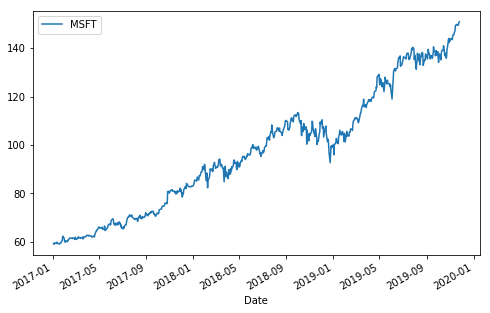

In [5]:
ticker = ['MSFT']
start_date = '2017-01-01'

closes_msft = get_adj_closes(ticker, start_date)
closes_msft.plot(figsize=(8,5));
plt.legend(ticker);

In [6]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

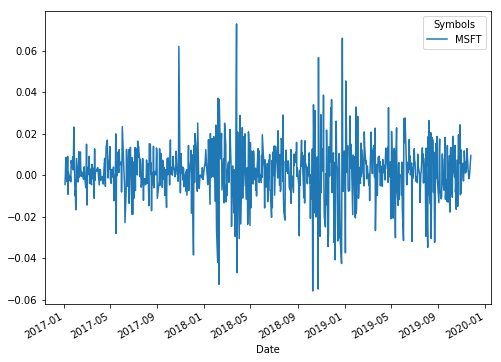

In [7]:
ret_msft = calc_daily_ret(closes_msft)
ret_msft.plot(figsize=(8,6));

In [8]:
indice_opt = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==140) & (msft_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
553,140.0,2021-01-15,put,...,2019-11-25 20:19:54,2019-11-25 17:30:10,"{'contractSymbol': 'MSFT210115P00140000', 'str..."


In [9]:
i_opt= indice_opt.index
opcion_valuar = msft_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MSFT210115P00140000',
 'strike': 140.0,
 'currency': 'USD',
 'lastPrice': 9.75,
 'change': -0.75,
 'percentChange': -7.1428576,
 'volume': 5,
 'openInterest': 4897,
 'bid': 9.65,
 'ask': 9.85,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574703010,
 'impliedVolatility': 0.23743438354492186,
 'inTheMoney': False}

In [10]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  150.985


# Simulación de precios usando rendimiento simple y logarítmico 

In [11]:
# Descargamos los precios de apple
ticker = ['MSFT']
start_date = '2017-01-01'

closes_msft = get_adj_closes(ticker, start_date)
closes_msft

Symbols,MSFT
Date,
2017-01-03,59.295
2017-01-04,59.030
2017-01-05,59.030
2017-01-06,59.541
2017-01-09,59.352
...,...
2019-11-19,149.880
2019-11-20,149.620
2019-11-21,149.480


In [12]:
# Obtenemos el rendimiento simple
Ri = closes_msft.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,MSFT
Date,
2017-01-04,-4.474e-03
2017-01-05,0.000e+00
2017-01-06,8.668e-03
2017-01-09,-3.183e-03
2017-01-10,-3.193e-04
...,...
2019-11-19,3.325e-04
2019-11-20,-1.735e-03
2019-11-21,-9.357e-04


In [13]:
ndays = 422
nscen = 10
dates = pd.date_range(start='2019-11-21', end='2021-01-15')
len (dates)

422

In [14]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2019-11-21,2.833e-02,2.760e-03,-1.593e-02,...,1.102e-02,-5.829e-03,-9.434e-05
2019-11-22,1.756e-04,1.318e-05,2.239e-04,...,3.324e-04,-1.335e-04,-2.184e-06
2019-11-23,5.512e-07,5.391e-07,-1.468e-06,...,4.122e-06,-2.515e-06,-4.722e-08
2019-11-24,-6.962e-10,-7.309e-09,2.228e-08,...,-3.432e-08,-2.051e-08,3.784e-11
2019-11-25,-4.876e-12,1.778e-11,4.567e-10,...,6.712e-11,2.040e-10,-8.272e-13
...,...,...,...,...,...,...,...
2021-01-11,-0.000e+00,0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,-0.000e+00
2021-01-12,0.000e+00,0.000e+00,-0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2021-01-13,-0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2021-01-14,-0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,-0.000e+00,-0.000e+00


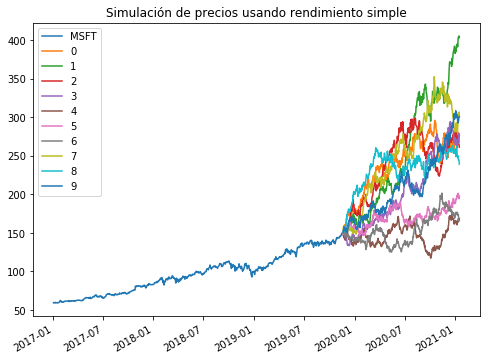

In [15]:
# Simulación del precio
S_0 = closes_msft.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_msft,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

- **Rendimiento logarítmico**

0.23688904056044507

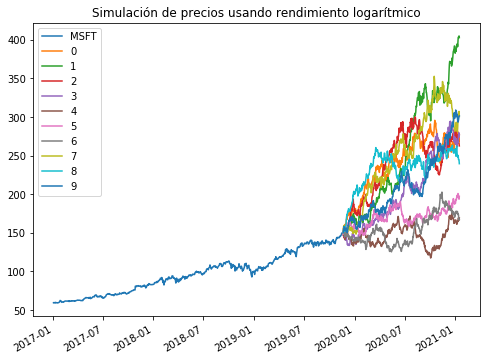

In [16]:
ri = calc_daily_ret(closes_msft)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_msft.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_msft,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [17]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.013832385411309083, 0.013813100450928319)

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [18]:
mu = ret_msft.mean()[0]
sigma = ret_msft.std()[0]
mu, sigma

(0.0012823833028362394, 0.013813089650647106)

In [19]:
# Tasa de bonos de 1 yr de fecha 11/01/19 -> 1.53%
r = 0.0153/360 # Tasa diaria

In [20]:
ndays = 422
nscen = 10
dates = pd.date_range(start='2019-11-14', periods = ndays)
dates

DatetimeIndex(['2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23',
               ...
               '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-02',
               '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', length=422, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [21]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-14,-0.032,1.297e-02,0.029,...,-0.005,-0.006,0.015
2019-11-15,-0.033,3.521e-03,0.029,...,0.013,-0.013,0.031
2019-11-16,-0.044,6.807e-05,0.031,...,0.013,-0.027,0.043
2019-11-17,-0.040,1.363e-03,0.009,...,0.014,-0.006,0.058
2019-11-18,-0.047,-1.487e-02,0.008,...,0.014,-0.014,0.055
...,...,...,...,...,...,...,...
2021-01-04,0.020,-2.204e-02,0.048,...,0.380,0.207,-0.210
2021-01-05,0.012,-2.389e-02,0.041,...,0.374,0.229,-0.217
2021-01-06,0.017,-2.028e-02,0.044,...,0.383,0.210,-0.209
2021-01-07,0.020,-2.717e-02,0.046,...,0.393,0.208,-0.194


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [22]:
S0 = closes_msft.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-14,146.189,152.989,155.395,...,150.244,150.048,153.294
2019-11-15,146.122,151.550,155.486,...,152.960,149.058,155.738
2019-11-16,144.509,151.027,155.749,...,153.005,146.989,157.685
2019-11-17,145.147,151.223,152.425,...,153.167,150.180,160.016
2019-11-18,144.032,148.788,152.202,...,153.126,148.869,159.595
...,...,...,...,...,...,...,...
2021-01-04,154.045,147.725,158.399,...,220.906,185.789,122.391
2021-01-05,152.792,147.451,157.262,...,219.484,189.920,121.498
2021-01-06,153.560,147.985,157.874,...,221.493,186.307,122.568
2021-01-07,154.125,146.969,158.153,...,223.701,185.976,124.354


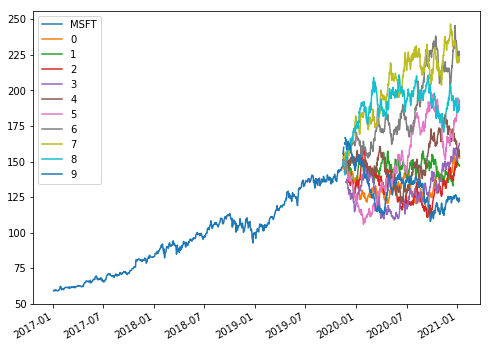

In [23]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_msft,sim_closes]).plot(figsize=(8,6));

In [24]:
from datetime import date
Hoy = date.today()
K=140  # strike price
ndays = 422 
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_msft.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

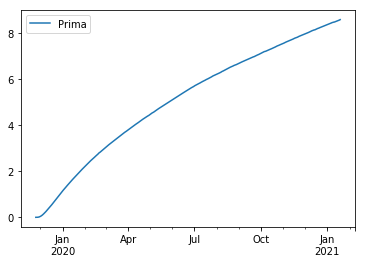

In [25]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();


In [26]:
put.iloc[-1]

Prima    8.568
Name: 2021-01-19 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [27]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(8.189806304296335, 8.946842819652167)
(8.189806304296335, 8.946842819652167)


## Precios simulados usando técnicas de reducción de varianza

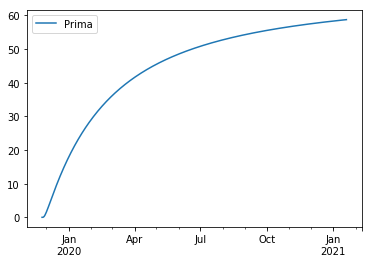

In [28]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret2.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [29]:
put.iloc[-1]

Prima    58.743
Name: 2021-01-19 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [47]:
confianza = 0.95
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)
print('Valor de la opción',opcion_valuar.Last)

(-641935185.7860825, 641935303.2729976)
(-641857480.5994238, 641857598.0863389)
Valor de la opción 9.75


### Análisis de la distribución de los rendimientos

### Ajustando norm

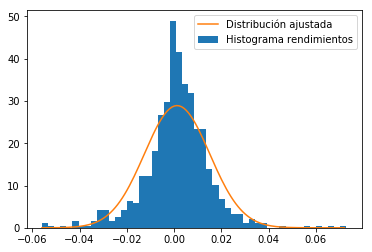

In [31]:
ren = calc_daily_ret(closes_msft) # rendimientos 
y,x,des = plt.hist(ren['MSFT'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


### Ajustando t

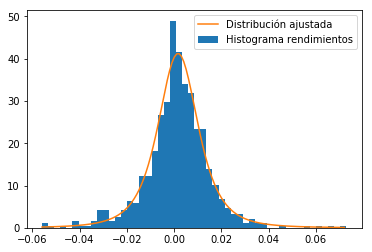

In [32]:
ren = calc_daily_ret(closes_msft) # rendimientos 
y,x,des = plt.hist(ren['MSFT'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

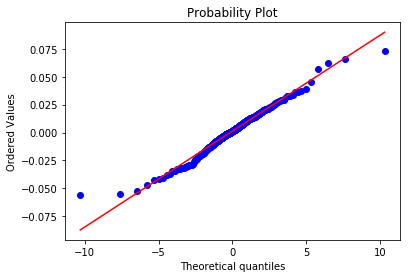

In [33]:
st.probplot(ren['MSFT'],sparams= dof, dist='t', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

In [34]:
ndays = 422 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [35]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [36]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2019-11-25,1.371e-02,-3.010e-02,-1.755e-03,...,-2.752e-02,-0.002,0.029
2019-11-26,8.224e-04,3.399e-03,1.113e-02,...,2.917e-02,0.003,-0.002
2019-11-27,-6.908e-03,-1.755e-03,-1.979e-02,...,8.224e-04,0.011,0.003
2019-11-28,8.553e-03,1.371e-02,1.113e-02,...,3.399e-03,0.009,0.014
2019-11-29,-9.485e-03,-1.755e-03,8.224e-04,...,1.113e-02,0.019,-0.020
...,...,...,...,...,...,...,...
2021-01-15,8.224e-04,8.224e-04,8.224e-04,...,-1.755e-03,0.009,0.003
2021-01-16,1.371e-02,2.659e-02,8.224e-04,...,-1.755e-03,0.006,-0.009
2021-01-17,8.224e-04,-6.908e-03,-2.237e-02,...,3.399e-03,0.014,0.016
2021-01-18,-9.485e-03,2.144e-02,3.399e-03,...,-4.331e-03,-0.012,0.009


In [37]:
sim_closes_hist = (closes_msft.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2019-11-25,153.101,146.539,150.752,...,146.917,150.752,155.487
2019-11-26,153.227,147.038,152.440,...,151.266,151.266,155.214
2019-11-27,152.172,146.780,149.452,...,151.390,152.959,155.743
2019-11-28,153.479,148.806,151.125,...,151.906,154.273,157.892
2019-11-29,152.031,148.545,151.249,...,153.606,157.210,154.798
...,...,...,...,...,...,...,...
2021-01-15,434.842,729.929,416.204,...,388.230,511.491,428.170
2021-01-16,440.844,749.600,416.546,...,387.549,514.557,424.128
2021-01-17,441.206,744.439,407.332,...,388.869,521.659,431.091
2021-01-18,437.041,760.570,408.719,...,387.188,515.404,434.794


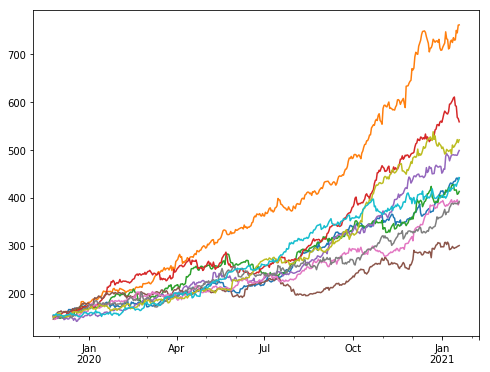

In [38]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

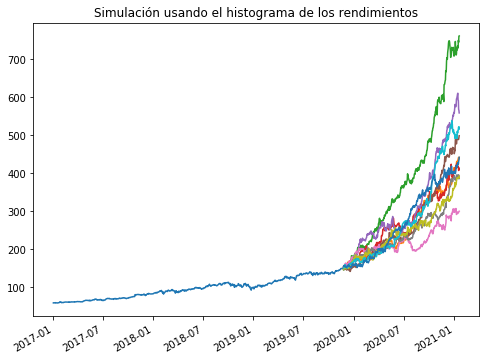

In [39]:
pd.concat([closes_msft,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [40]:
K=140
ndays = 422
nscen = 10000
freq, values = np.histogram(ret_msft+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2019-11-21',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_msft.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

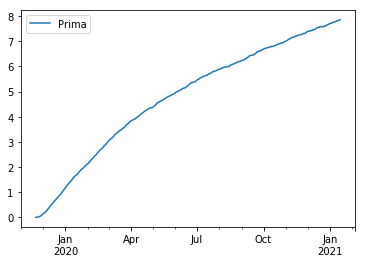

In [41]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [42]:
put_hist.iloc[-1]

Prima    7.858
Name: 2021-01-15 00:00:00, dtype: float64

In [45]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(6.930132957449981, 8.785048763578033)
(6.930132957449981, 8.785048763578033)
